In [11]:
%matplotlib widget

In [12]:
import numpy as np

In [22]:
import plotly.graph_objects as go

In [15]:
origin = np.array([0, 0, 0])
pivot = np.array([-1, -1, 10])
surface_1_from_pivot = np.array([2, 2, -1])
surface_2_from_pivot = np.array([2, 2, 1])

In [16]:
euler_0 = np.array([0, 0, 0])
euler_1 = np.array([np.pi/12, np.pi/12, np.pi/12])
euler_2 = np.array([np.pi/12, np.pi/12, np.pi/12])

In [17]:
def RotMat(alpha, beta, gamma):
    return np.array([
        [np.cos(alpha) * np.cos(gamma) + np.sin(alpha) * np.sin(beta) * np.sin(gamma),
         -np.cos(beta) * np.sin(gamma), 
         -np.sin(alpha) * np.cos(gamma) + np.cos(alpha) * np.sin(beta) * np.sin(gamma)],
        [np.cos(alpha) * np.sin(gamma) - np.sin(alpha) * np.sin(beta) * np.cos(gamma),
         np.cos(beta) * np.cos(gamma), 
         -np.sin(alpha) * np.sin(gamma) - np.cos(alpha) * np.sin(beta) * np.cos(gamma)],
        [np.sin(alpha) * np.cos(beta),
         np.sin(beta), 
         np.cos(alpha) * np.cos(beta)]
    ])
        

In [18]:
x = np.array(
    [np.linspace(0, 1, 11), np.zeros(11),  np.zeros(11)]
)
y = np.array(
    [np.zeros(11),  np.linspace(0, 1, 11), np.zeros(11)]
)
z = np.array(
    [np.zeros(11),  np.zeros(11), np.linspace(0, 1, 11)]
)

In [40]:
x_pivot = RotMat(*euler_0) @ x + pivot[..., np.newaxis]
y_pivot = RotMat(*euler_0) @ y + pivot[..., np.newaxis]
z_pivot = RotMat(*euler_0) @ z + pivot[..., np.newaxis]

In [58]:
x_surf1 = RotMat(*euler_1) @ x_pivot + RotMat(*euler_0) @ surface_1_from_pivot[..., np.newaxis] + pivot[..., np.newaxis]
y_surf1 = RotMat(*euler_1) @ y_pivot + RotMat(*euler_0) @ surface_1_from_pivot[..., np.newaxis] + pivot[..., np.newaxis]
z_surf1 = RotMat(*euler_1) @ z_pivot + RotMat(*euler_0) @ surface_1_from_pivot[..., np.newaxis] + pivot[..., np.newaxis]

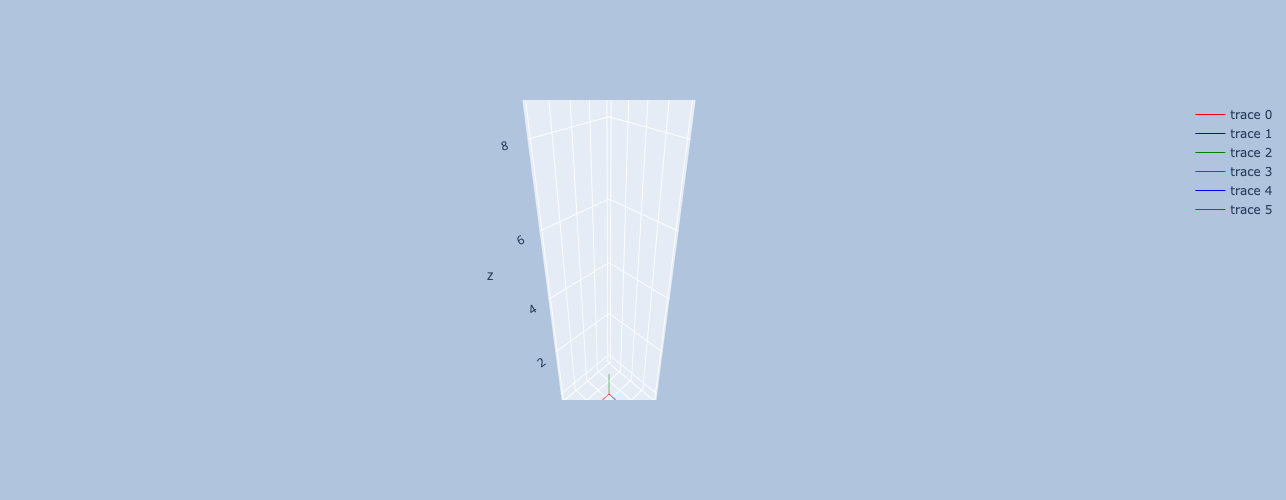

In [57]:
fig = go.Figure()
fig.add_trace(
    go.Scatter3d(
        x=x[0], y=x[1], z=x[2],
        mode='lines',
        line=dict(
            color='red',
            width=1
        )
    )
)
fig.add_trace(
    go.Scatter3d(
        x=y[0], y=y[1], z=y[2],
        mode='lines',
        line=dict(
            color='blue',
            width=1
        )
    )
)
fig.add_trace(
    go.Scatter3d(
        x=z[0], y=z[1], z=z[2],
        mode='lines',
        line=dict(
            color='green',
            width=1
        )
    )
)

fig.add_trace(
    go.Scatter3d(
        x=x_pivot[0], y=x_pivot[1], z=x_pivot[2],
        mode='lines',
        line=dict(
            color='red',
            width=1
        )
    )
)
fig.add_trace(
    go.Scatter3d(
        x=y_pivot[0], y=y_pivot[1], z=y_pivot[2],
        mode='lines',
        line=dict(
            color='blue',
            width=1
        )
    )
)
fig.add_trace(
    go.Scatter3d(
        x=z_pivot[0], y=z_pivot[1], z=z_pivot[2],
        mode='lines',
        line=dict(
            color='green',
            width=1
        )
    )
)

fig.add_trace(
    go.Scatter3d(
        x=x_surf1[0], y=x_surf1[1], z=x_surf1[2],
        mode='lines',
        line=dict(
            color='red',
            width=1
        )
    )
)
fig.add_trace(
    go.Scatter3d(
        x=y_surf1[0], y=y_surf1[1], z=y_surf1[2],
        mode='lines',
        line=dict(
            color='blue',
            width=1
        )
    )
)
fig.add_trace(
    go.Scatter3d(
        x=z_surf1[0], y=z_surf1[1], z=z_pivot[2],
        mode='lines',
        line=dict(
            color='green',
            width=1
        )
    )
)


fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.update_scenes(aspectmode='data')

fig.show()